# Question 1:
1. Use the IRIS dataset and create a decision tree and check the accuracy label.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(iris.data,iris.target,train_size=0.2,random_state=10)

In [15]:
stand=StandardScaler()

In [16]:
xtrain=stand.fit_transform(xtrain)
xtest=stand.fit_transform(xtest)

In [18]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [19]:
tree_cl=DecisionTreeClassifier(criterion='entropy',random_state=10)
tree_cl.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [20]:
y_predict=tree_cl.predict(xtest)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [24]:
print("Accuracy : ",accuracy_score(ytest,y_predict))

Accuracy :  0.9416666666666667


In [25]:
print(confusion_matrix(ytest,y_predict))

[[41  0  0]
 [ 0 37  4]
 [ 0  3 35]]


[Text(200.88000000000002, 181.2, 'X[3] <= 0.552\nentropy = 1.571\nsamples = 30\nvalue = [9, 9, 12]'),
 Text(133.92000000000002, 108.72, 'X[2] <= -0.741\nentropy = 1.0\nsamples = 18\nvalue = [9, 9, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(267.84000000000003, 108.72, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12]')]

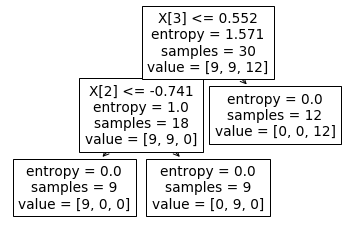

In [27]:
tree.plot_tree(tree_cl)

In [29]:
text_representation=tree.export_text(tree_cl)
print(text_representation)

|--- feature_3 <= 0.55
|   |--- feature_2 <= -0.74
|   |   |--- class: 0
|   |--- feature_2 >  -0.74
|   |   |--- class: 1
|--- feature_3 >  0.55
|   |--- class: 2

